To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Shortest Path Problem

In this tutorial we will solve shortest path problem using the Python library "NetworkX". 

First, let's start by importing the libraries.

In [2]:
import numpy as np
import networkx as nx

# Problem 04

A workshop plans to operate a machine for three time periods. At the beginning of each period, a decision can be made whether to keep the existing machine or replace it with a new machine. A new machine can be operated for a maximum of two consecutive periods. The present machine is not new and has been used for one period of time. All relevant data is provided below. Find the most cost-effective solution within the planning horizon.

| Age | Operating cost | Salvage value |
| :-------------------: | :------------: | :------------: |
| 0 | 15 | 70 |
| 1 | 35 | 40 |
| 2 | - | 20 |

The Python library "NetworkX" supports directed graphs with self loops through the class DiGraph.

In [3]:
G1 = nx.DiGraph()
G1.add_nodes_from([
    ("I.1", {"color": "black"}),
    ("II.1", {"color": "black"}),
    ("II.2", {"color": "black"}),
    ("III.1", {"color": "black"}),
    ("III.2", {"color": "black"}),
    ("IV.1", {"color": "black"}),
    ("IV.2", {"color": "black"}),
    ("V", {"color": "black"}),
])

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [4]:
nodepos = {
    "I.1":np.array([0.0,0.0]),
    "II.1":np.array([1.0,1.0]),
    "II.2":np.array([1.0,-1.0]),
    "III.1":np.array([2.0,1.0]),
    "III.2":np.array([2.0,-1.0]),
    "IV.1":np.array([3.0,1.0]),
    "IV.2":np.array([3.0,-1.0]),
    "V":np.array([4.0,0.0]),
}

{('I.1', 'II.1'): Text(0.5, 0.5, '85'),
 ('I.1', 'II.2'): Text(0.5, -0.5, '35'),
 ('II.1', 'III.1'): Text(1.5, 1.0, '85'),
 ('II.1', 'III.2'): Text(1.5, 0.0, '35'),
 ('II.2', 'III.1'): Text(1.5, 0.0, '85'),
 ('III.1', 'IV.1'): Text(2.5, 1.0, '45'),
 ('III.1', 'IV.2'): Text(2.5, 0.0, '15'),
 ('III.2', 'IV.1'): Text(2.5, 0.0, '45'),
 ('IV.1', 'V'): Text(3.5, 0.5, '0'),
 ('IV.2', 'V'): Text(3.5, -0.5, '0')}

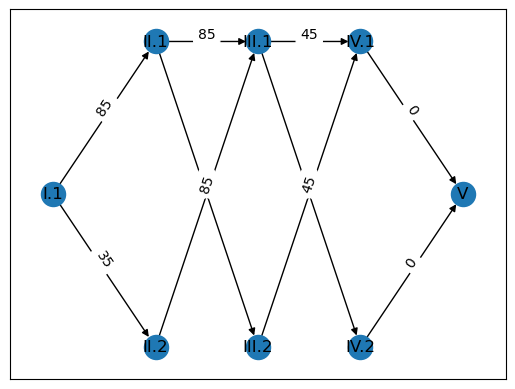

In [5]:
elist = [("I.1", "II.1"), # Replace
         ("I.1", "II.2"), # Keep
         ("II.1", "III.1"), # Replace
         ("II.1", "III.2"), # Keep
         ("II.2", "III.1"), # Replace
         ("III.1", "IV.1"), # Replace
         ("III.1", "IV.2"), # Keep
         ("III.2", "IV.1"), # Replace
         ("IV.1", "V"), # Dummy
         ("IV.2", "V")] # Dummy
G1.add_edges_from(elist)
eattrs = {("I.1", "II.1"): {"weight": 70 + 15}, # replacement cost + operating cost
          ("I.1", "II.2"): {"weight": 0 + 35}, # no replacement + operating cost
          ("II.1", "III.1"): {"weight": 70 + 15}, # replacement cost + operating cost
          ("II.1", "III.2"): {"weight": 0 + 35}, # no replacement + operating cost
          ("II.2", "III.1"): {"weight": 70 + 15}, # replacement cost + operating cost
          ("III.1", "IV.1"): {"weight": 70 + 15 - 40}, # replacement cost + operating cost - salvage value
          ("III.1", "IV.2"): {"weight": 0 + 35 - 20}, # no replacement + operating cost - salvage value
          ("III.2", "IV.1"): {"weight": 70 + 15 - 40}, # replacement cost + operating cost - salvage value
          ("IV.1", "V"): {"weight": 0}, # dummy
          ("IV.2", "V"): {"weight": 0}} # dummy
nx.set_edge_attributes(G1, eattrs)
nx.draw_networkx_nodes(G1, pos = nodepos)
nx.draw_networkx_labels(G1, pos = nodepos)
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'weight'), label_pos = 0.5, verticalalignment = 'bottom')

To get information on the graph "G1":

In [6]:
print(G1)

DiGraph with 8 nodes and 10 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [7]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 1)	85
  (0, 2)	35
  (1, 3)	85
  (1, 4)	35
  (2, 3)	85
  (3, 5)	45
  (3, 6)	15
  (4, 5)	45
  (5, 7)	0
  (6, 7)	0


To have the adjacency matrix of the graph "G1" in dense form:

In [8]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[ 0 85 35  0  0  0  0  0]
 [ 0  0  0 85 35  0  0  0]
 [ 0  0  0 85  0  0  0  0]
 [ 0  0  0  0  0 45 15  0]
 [ 0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


In [9]:
path = nx.shortest_path(G1, source='I.1', target='V', weight = 'weight', method = 'dijkstra')
print(path)

['I.1', 'II.2', 'III.1', 'IV.2', 'V']


In [10]:
totalcost = nx.shortest_path_length(G1, source='I.1', target='V', weight = 'weight', method = 'dijkstra')
print(totalcost)

135


# Dynamic Programming

If we want to solve the same problem with dynamic programming approach,

## Stage IV,

State IV.1: $-40$

State IV.2: $-20$

## Stage III,

State III.1: $min(70+15-40,0+35-20) = 15$ # min(replace,keep), keep*

State III.2: $70+15-40 = 45$ # replace*

## Stage II,

State II.1: $min(70+15+15,0+35+45) = 80$ # min(replace,keep), keep*

State II.2: $70+15+15 = 100$ # replace*

## Stage I,

State I.1: $min(70+15+80,0+35+100) = 135$ # min(replace,keep), keep*

## Optimum solution

State I.1(keep*) -> State II.2(replace*) -> State III.1(keep*) -> State IV.2(salvage)